In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def f(x):
    return 3*x**2 - 4*x + 5;

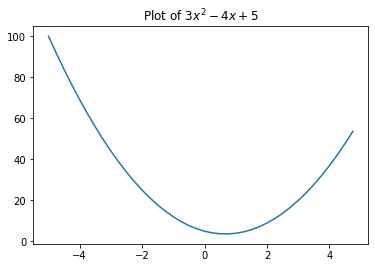

In [5]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)
plt.title("Plot of $3x^2-4x+5$");

### Differentiation And The Slopes
In case you forgot your high school math

Ddifferentiating the equation $$3x^2-4x+5$$ wrt $x$ would give us, $$6x-4$$ For $x=3$, we would get the value of $6x-4$ as 14. That is what the slope is as shown below

In [6]:
h = 0.00000001
x = 3
print("f(x) = {}".format(f(x)))
print("f(x+h) = {}".format(f(x+h)))
print("Slope = {}".format((f(x+h)-f(x))/h))

f(x) = 20
f(x+h) = 20.00000014
Slope = 14.00000009255109


For $x=-3$, we would get the value of $6x-4$ as -22. That is what the slope is as shown below

In [6]:
h = 0.00000001
x = -3
print("f(x) = {}".format(f(x)))
print("f(x+h) = {}".format(f(x+h)))
print("Slope = {}".format((f(x+h)-f(x))/h))

f(x) = 44
f(x+h) = 43.999999779999996
Slope = -22.00000039920269


At some point, the slope becomes 0

In [10]:
h = 0.0000001
x = 2/3
print("Slope = {}".format((f(x+h)-f(x))/h))
print("Note, that its very close to 0 ot almost 0")

Slope = 2.9753977059954195e-07
Note, that its very close to 0 ot almost 0


The next is another example of multi-variable equation, which is $$d_1 = a*b+c$$ 
Diffenrentiating this expression wrt to $a$ will give us, $$\frac{d d1}{da} = b$$
The value of $b$ is $-3$, which is what we get as the slope

In [38]:
## Another example
h = 0.0001
a = 2.0
b = -3.0
c = 10

d1 = a*b+c
a+=h
d2 = a*b+c

print("d1 = {}".format(d1))
print("d2 = {}".format(d2))
print("Slope = {}".format((d2-d1)/h))

d1 = 4.0
d2 = 3.999699999999999
Slope = -3.000000000010772


Differentiating wrt to $c$ gives us a different result as expected because,
$$\frac{d d1}{dc} = 1$$

In [87]:
## Another example
h = 0.0001 # the slight nudge

a = 2.0
b = -3.0
c = 10

d1 = a*b+c
c+=h
d2 = a*b+c

print("d1 = {}".format(d1))
print("d2 = {}".format(d2))
print("Slope = {}".format((d2-d1)/h))

d1 = 4.0
d2 = 4.0001
Slope = 0.9999999999976694


#### Designing the `value` object of micrograd

In [8]:
class Value:
    def __init__(self, data, _children = (), _op='', label=''):
        self.data = data
        self.grad = 0.0 #initially we assume that input do not effect the output.
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data}, label={self.label})"
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [9]:
a = Value(2, label='a')
b = Value(-3, label='b')
c = Value(10, label='c')

e = a*b; e.label='e'
d = e+c; d.label='d'

f = Value(-2.0, label='f')
L = d*f; L.label='L'

L

Value(data=-8.0, label=L)

In [12]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [14]:
L.grad = 1

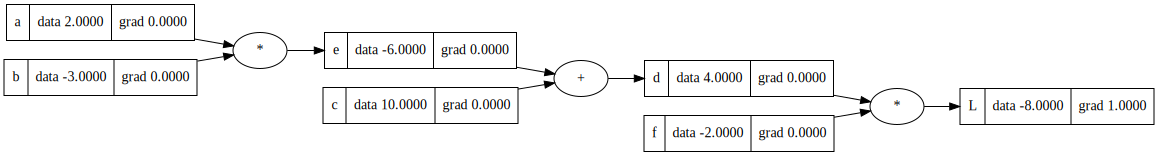

In [15]:
draw_dot(L)

In [104]:
def lol():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    d.data += h
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data
    print((L2 - L1)/h)
  
lol()

-2.000000000000668
